In [7]:


import better 

import numpy as np

import EFIE_solver as efie

light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

class antenna:
    def __init__(self, position, angle, length, source_position, radius):
        self.position = position
        self.angle = angle
        self.length = length
        self.source_position = source_position
        self.radius = radius

delta_r = light_speed / frequency / 5e2
test = antenna(np.array([[0.0, 0.0], [0.3, 0.3]]), 
               np.array([np.pi/2, np.pi/2]), 
               np.array([1.068, 0.956]), 
               np.array([[0.0, 0.0]]), 
               np.array([3.175e-3, 3.175e-3]))


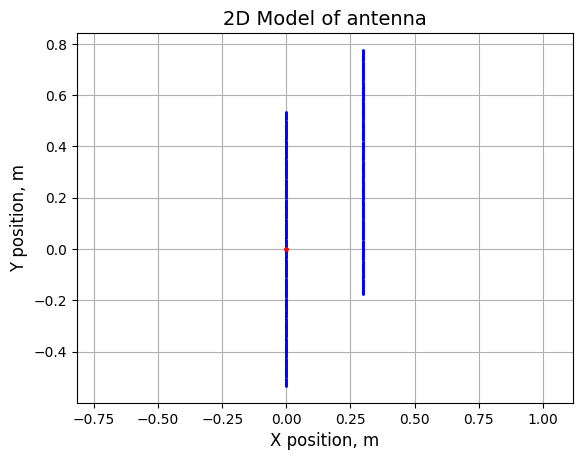

In [8]:
import geometry as gm
R_block, R = gm.calculate_positions(antenna=test, delta_r=delta_r)
gm.plot_antenna(R_block=R_block, R=R, antenna=test, delta_r=delta_r)

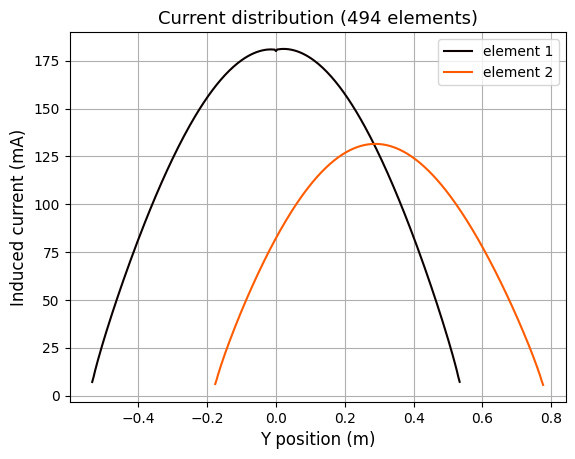

In [9]:
current_block, current = efie.directional_pattern(test, incident_voltage, frequency, delta_r)
gm.current_disribution_together(R_block, current_block)
gm.current_distribution_2d(R, current)